In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable

In [ ]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

Text(0.5, 1.0, 'Bar chart of means with margin of error')

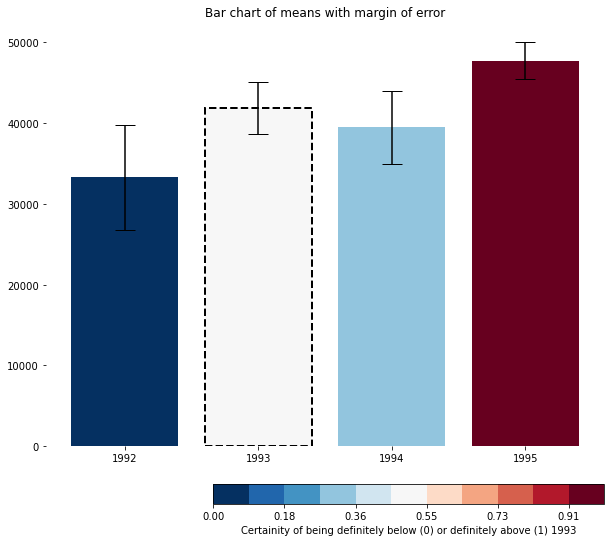

In [137]:
# Transpose dataframe 
#df = df.T 

# get height(means) and x-labels
x = [str(i) for i in df.columns.to_list()]
y = np.array([df[i].describe().loc['mean'] for i in df.columns])

# calculate standard error μ/sqrt(n)
std = [df[i].describe()['std'] for i in df.columns.to_list()]
count = [df[i].describe()['count'] for i in df.columns.to_list()]
se = [std[i]/np.sqrt(count[i]) for i in range(len(std))]
# calculate margin of error z*(μ/sqrt(n))
me = [1.96*se[i] for i in range(len(se))]

# create plot
fig, ax =  plt.subplots(figsize = (10,10))

# plot bar chart
rects = ax.bar(x, y, yerr = me, capsize = 10, color = colors)
# plot dotted rectangle
r = patches.Rectangle((0.6, 0), 0.8, y[1], lw = 2, ls = '--', edgecolor ='black',
facecolor='none')
ax.add_patch(r)

# color range for the colorbar
cmap = mpl.colors.ListedColormap(['#053061', '#2166ac','#4393c3', '#92c5de',
'#d1e5f0', '#f7f7f7', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f'])
# color for the bar chart
colors = ['#053061', '#f7f7f7', '#92c5de', '#67001f']
# color for the boundaries of the colobar
cmap.set_over('#67001f')
cmap.set_under('#053061')
# values of the ticks of the colorbar
bounds = [0, 0.09, 0.18, 0.27, 0.36, 0.45, 0.55, 0.64, 0.73, 
0.82, 0.91, 1]
# apply the boundaries to the colors
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#apply the colormap and norm
sm = ScalarMappable(cmap=cmap, norm= norm)
sm.set_array([])
# plot the colorbar
cbar = plt.colorbar(sm, orientation='horizontal', shrink = 0.7, anchor = (1, 0),
pad = 0.07)
cbar.set_label('Certainity of being definitely below (0) or definitely above (1) 1993')

# get rid of spines
borders = ['top', 'right', 'bottom', 'left']
ax.spines[borders].set_visible(False)

# title
plt.title('Bar chart of means with margin of error', 
fontsize = 12)